# Limpieza de Datos

### Importar librerias

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Cargar Archivo CSV

In [5]:
df=pd.read_csv("datos_apartamentos_rent.csv")

### Eliminación de variables descriptivas o poco significativas

In [6]:
df=df.drop(['id','title','body','currency','fee','address','source'],axis=1)


In [8]:
df.head()

,category,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,price_display,price_type,square_feet,cityname,state,latitude,longitude,time
0,housing/rent/apartment,NaN,NaN,0.0,Thumbnail,NaN,790,790,Monthly,101,Washington,DC,389057.0,-769861.0,1577359415
1,housing/rent/apartment,NaN,NaN,1.0,Thumbnail,NaN,425,425,Monthly,106,Evansville,IN,379680.0,-876621.0,1577017063
2,housing/rent/apartment,NaN,1.0,0.0,Thumbnail,NaN,1390,1.39,Monthly,107,Arlington,VA,388910.0,-770816.0,1577359410
3,housing/rent/apartment,NaN,1.0,0.0,Thumbnail,NaN,925,925,Monthly,116,Seattle,WA,476160.0,-1223275.0,1576667743
4,housing/rent/apartment,NaN,NaN,0.0,Thumbnail,NaN,880,880,Monthly,125,Arlington,VA,388738.0,-771055.0,1577359401


In [10]:
df.shape

(10000, 15)

In [11]:
df.describe()

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9.990000e+03,1.000000e+04
mean,1.380544,1.744021,1486.277500,945.810500,376951.620420,-9.465225e+05,1.574891e+09
std,0.615410,0.942354,1076.507968,655.755736,54958.509131,1.575980e+05,3.762395e+06
min,1.000000,0.000000,200.000000,101.000000,213155.000000,-1.580221e+06,1.568744e+09
25%,1.000000,1.000000,949.000000,649.000000,336798.500000,-1.013017e+06,1.568781e+09
50%,1.000000,2.000000,1270.000000,802.000000,388098.000000,-9.365160e+05,1.577358e+09
75%,2.000000,2.000000,1695.000000,1100.000000,413498.000000,-8.220998e+05,1.577359e+09
max,8.500000,9.000000,52500.000000,40000.000000,615940.000000,-7.019160e+05,1.577362e+09


### Revisión de Duplicados en el DF

In [12]:
duplicates=len(df[df.duplicated()])
print(f'Numer of Duplicates Entries:{duplicates}')

Numer of Duplicates Entries:8


### Eliminación de Duplicados

In [13]:
df=df.drop_duplicates()

### Revisar faltantes por columna

In [15]:
print(df.isnull().sum())

category            0
amenities        3545
bathrooms          34
bedrooms            7
has_photo           0
pets_allowed     4160
price               0
price_display       0
price_type          0
square_feet         0
cityname           75
state              75
latitude           10
longitude          10
time                0
dtype: int64


### Eliminación de algunas columnas con faltantes

In [16]:
df=df.drop(['amenities','pets_allowed'],axis=1)

### Modificación de faltantes

In [17]:
df=df.dropna(subset=['cityname', 'latitude'])

In [18]:
df.loc[:,'bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df.loc[:,'bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

### Revisión de faltantes

In [19]:
print(df.isnull().sum())

category         0
bathrooms        0
bedrooms         0
has_photo        0
price            0
price_display    0
price_type       0
square_feet      0
cityname         0
state            0
latitude         0
longitude        0
time             0
dtype: int64


### Tipos de datos en el dataset

In [20]:
types = df.dtypes.value_counts()

print('Number of Features: %d'%(df.shape[1]))
print('Number of Customers: %d'%(df.shape[0]))
print('Data Types and Frequency in Dataset:')
print(types)

Number of Features: 13
Number of Customers: 9917
Data Types and Frequency in Dataset:
object     6
float64    4
int64      3
Name: count, dtype: int64


### Análisis de valores atipicos

In [21]:
datos_numericos = df.select_dtypes(include=['float64', 'int64'])

In [23]:
Q1 = datos_numericos.quantile(0.25)
Q3 = datos_numericos.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers
outliers = ((datos_numericos < (Q1 - 1.5 * IQR)) | (datos_numericos > (Q3 + 1.5 * IQR)))

print(outliers)

      bathrooms  bedrooms  price  square_feet  latitude  longitude   time
0         False     False  False        False     False      False  False
1         False     False  False        False     False      False  False
2         False     False  False        False     False      False  False
3         False     False  False        False     False      False  False
4         False     False  False        False     False      False  False
...         ...       ...    ...          ...       ...        ...    ...
9995       True      True   True         True     False      False  False
9996       True      True   True         True     False      False  False
9997       True      True   True         True     False      False  False
9998      False     False   True         True     False      False  False
9999      False     False  False        False     False      False  False

[9917 rows x 7 columns]


In [24]:
print(outliers.sum())

bathrooms       72
bedrooms       508
price          613
square_feet    618
latitude        56
longitude       56
time             0
dtype: int64


In [25]:
df_cleaned=df[(outliers==False).all(axis=1)]
print(df_cleaned)

                    category  bathrooms  bedrooms  has_photo  price  \
0     housing/rent/apartment        1.0       0.0  Thumbnail    790   
1     housing/rent/apartment        1.0       1.0  Thumbnail    425   
2     housing/rent/apartment        1.0       0.0  Thumbnail   1390   
3     housing/rent/apartment        1.0       0.0  Thumbnail    925   
4     housing/rent/apartment        1.0       0.0  Thumbnail    880   
...                      ...        ...       ...        ...    ...   
9372  housing/rent/apartment        2.0       3.0  Thumbnail   1449   
9373  housing/rent/apartment        3.0       3.0  Thumbnail   1299   
9375  housing/rent/apartment        2.0       3.0  Thumbnail   2000   
9376  housing/rent/apartment        2.0       3.0  Thumbnail   1400   
9999  housing/rent/apartment        1.0       1.0         No   1009   

     price_display price_type  square_feet       cityname state  latitude  \
0              790    Monthly          101     Washington    DC  38905

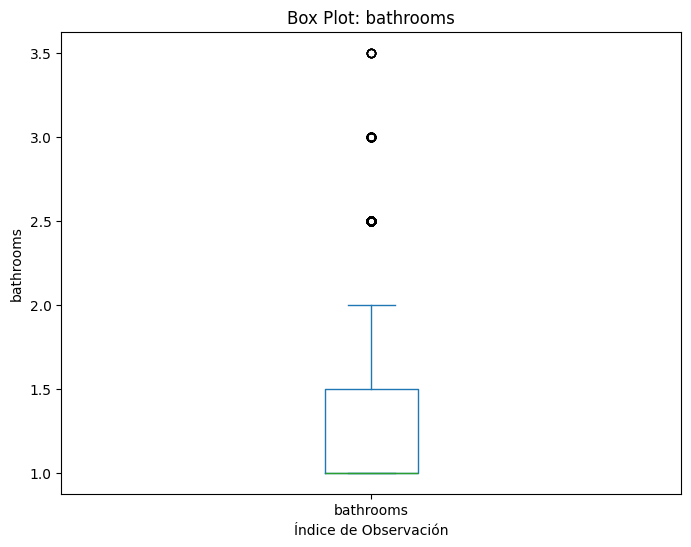

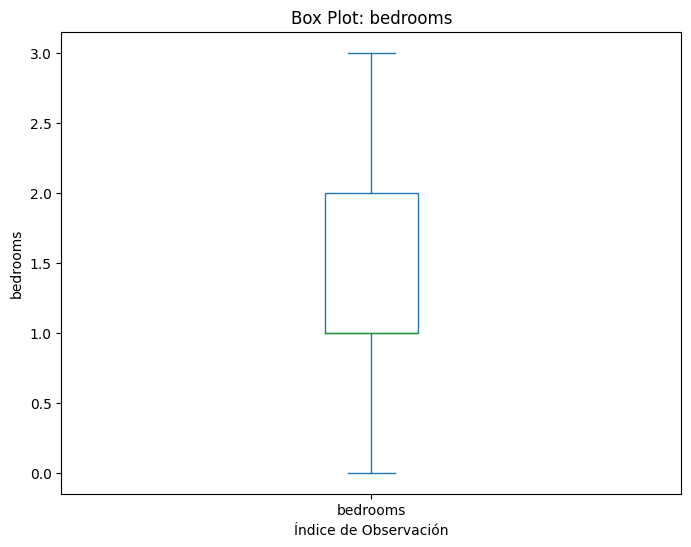

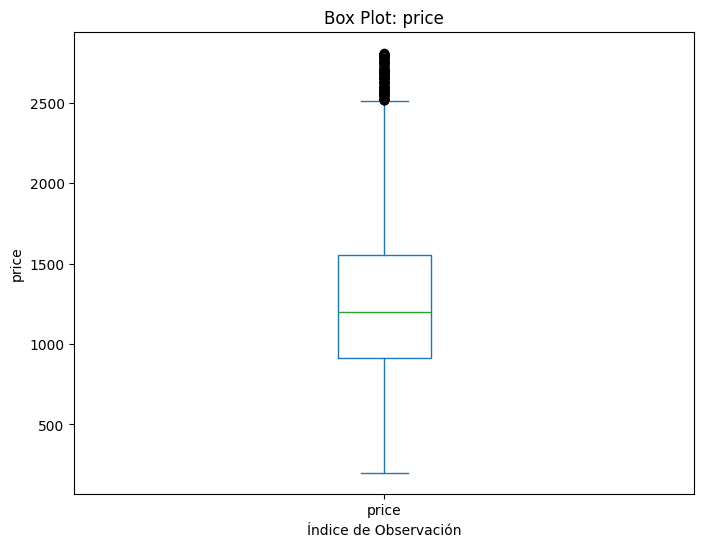

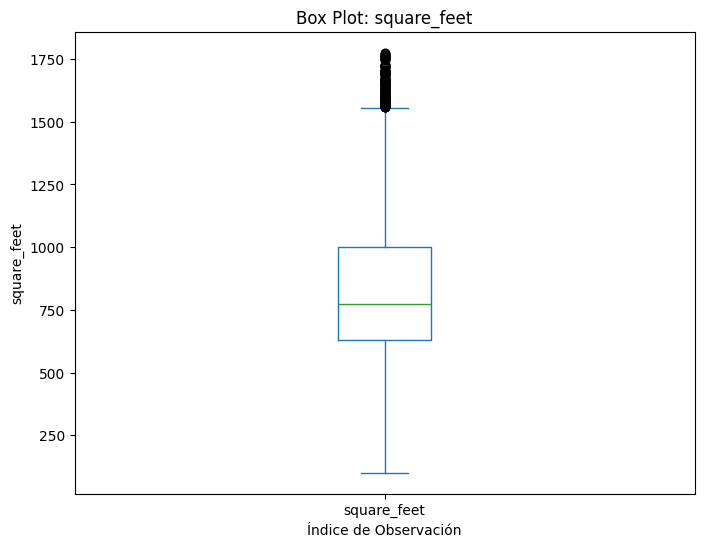

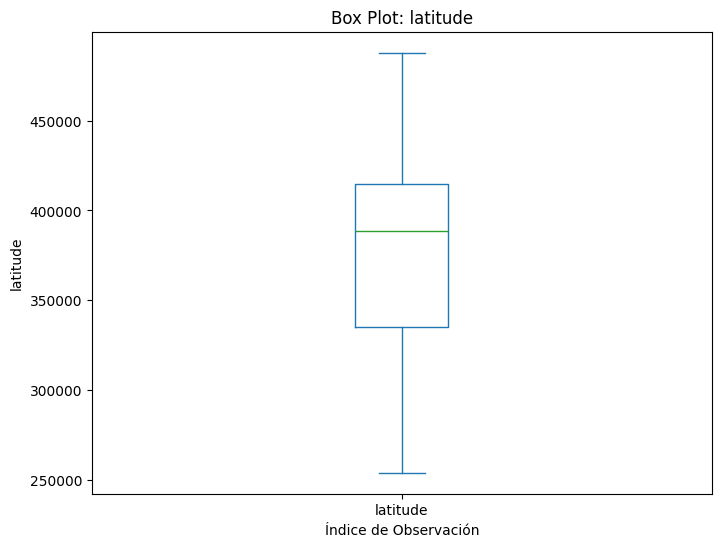

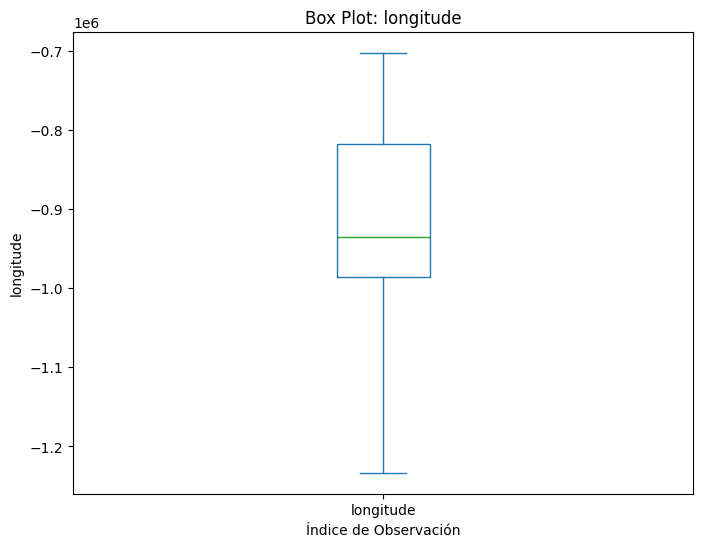

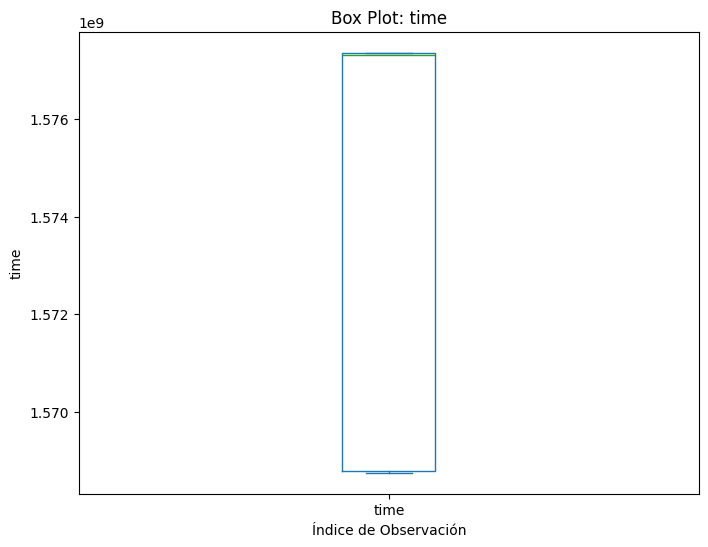

In [27]:
for column in datos_numericos.columns:
    plt.figure(figsize=(8, 6))
    df_cleaned[column].plot(kind='box')
    plt.title(f'Box Plot: {column}')
    plt.xlabel('Índice de Observación')
    plt.ylabel(column)
    plt.show()

In [28]:
catcols = df.select_dtypes(exclude = ['int64','float64']).columns
 
data_dummie = pd.get_dummies(df, columns = catcols)

In [29]:
df_cleaned.to_csv('Data_limpia.csv', index=False)